In [12]:
! rm -rf outputs/*
!python ../src/grennen_reps.py  --x64 --tol-inf 1e-13


Running 100 replications with random initial prices...
Using JAX_ENABLE_X64=1
Solver tolerances: tol_inf=1e-13, tol_l2=None
Comparison tolerance: 0.005
Lower price bounds: [0.034 0.034 0.034 0.034 0.034 0.034 1.103 1.103]
Upper price bounds: [19.356733 19.356733 19.356733 19.356733 19.356733 19.356733 19.356733
 19.356733]
Parallel workers: 8
Starting parallel execution...
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:  1.6min
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:  3.3min
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:  4.9min
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  6.9min
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  8.7min
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed: 11.5min
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed: 13.5min
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed: 16.4min
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed: 18

In [1]:
import sys, os
sys.path.append(os.path.abspath(".."))
from src.grennen_reps import load_replication_results
config, data = load_replication_results(data_root="../outputs")

Loading most recent results: ../outputs/grennen_reps_20251107_101938.npz


L-inf summary:
count    100.000000
mean       0.000446
std        0.001231
min        0.000144
25%        0.000144
50%        0.000144
75%        0.000144
max        0.008225
dtype: float64
count    100.000000
mean       0.000696
std        0.001922
min        0.000224
25%        0.000224
50%        0.000224
75%        0.000224
max        0.011570
dtype: float64


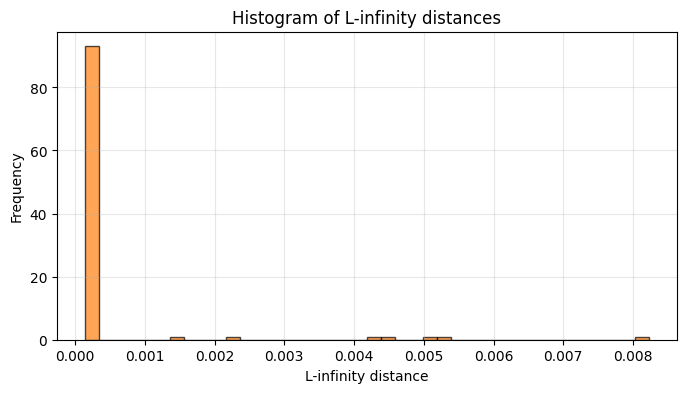

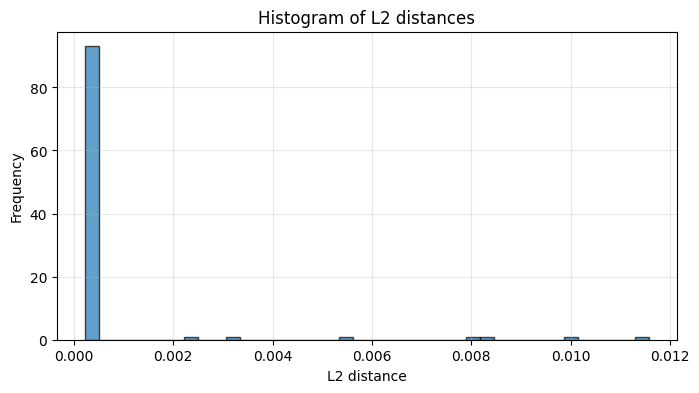

In [ ]:
import pandas as pd
import numpy as np
center_price = data['equilibria'].mean(axis=0)
diffs = data['equilibria'] - center_price
l2_distances = (diffs**2).sum(axis=1)**0.5
l_inf_distances = np.abs(diffs).max(axis=1)
t = pd.Series(l_inf_distances)

# quick summary for L-inf
print("L-inf summary:")
print(t.describe())

# histogram (uses pandas plotting which will import matplotlib as needed)
ax = t.plot.hist(bins=40, color='C1', edgecolor='k', alpha=0.7, figsize=(8,4))
ax.set_xlabel('L-infinity distance')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of L-infinity distances')
ax.grid(alpha=0.3)
plt = None  # avoid accidental use of plt before the explicit import below
import matplotlib.pyplot as plt

# summary stats
s = pd.Series(l2_distances)
print("\nL2 summary:")
print(s.describe())

# histogram
plt.figure(figsize=(8,4))
plt.hist(l2_distances, bins=40, color='C0', edgecolor='k', alpha=0.7)
plt.xlabel('L2 distance')
plt.ylabel('Frequency')
plt.title('Histogram of L2 distances')
plt.grid(alpha=0.3)
plt.show()